
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

#   1. Problem Statement

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider <b>BoomBikes</b> has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
 - Which variables are significant in predicting the demand for shared bikes.
 - How well those variables describe the bike demands.
 
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

#   2. Business Goal

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

To model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

<hr>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

#   3. Setting Up Jupyter Notebook

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [1]:
# Importing and supressing warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Disabling output scroll bar (using Javascript)

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

#   4. Reading and Understanding the Data

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [4]:
# Importing required libraries

import numpy as np
import pandas as pd

In [5]:
# Reading the data dictionary

from pathlib import Path
file = Path.cwd() / 'Readme.txt'
with open(file, 'r') as text:
    textfile = text.read()
    print(textfile)

Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
License

In [6]:
# Reading the dataset

bike=pd.read_csv("day.csv")

In [7]:
# Inspecting the top 5 rows of the dataset

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Inspecting the rows,columns (shape) of the dataset

bike.shape

(730, 16)

In [9]:
# Getting the information about NaN Values and Data Types of all the features in the dataset

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [10]:
# Inspecting the statistical summary of the dataset

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# Checking for the null values

bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
# Checking number of distinct elements in each feature

bike.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

   ### Summary:
- Performed manual elimination of features based on high p-value and high VIF.
- The feature `dteday` is object type while rest are int/float type.
- There are some features which are categorical in nature, but are present in int/float type.
- There are no missing/null values in the dataset.

<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

#   5. Cleaning the Data

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [13]:
# Removing Redundant/Unwanted/Irrelevant Columns

bike_clean = bike.drop(columns=['instant','dteday','casual','registered'])

In [14]:
# Segregating numerical and categorical type features

num_feat=[]
cat_feat=[]
for col in bike_clean.columns:
    if (bike_clean[col].nunique()>12):
        num_feat.append(col)
    else:
        cat_feat.append(col)
print(f'Numeric features: {num_feat}')
print()
print(f'Categorical features: {cat_feat}')

Numeric features: ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

Categorical features: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


In [15]:
# Checking correlation among the numeric features

bike_clean[num_feat].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [16]:
# Removing atemp due to high correlation with temp

bike_clean = bike_clean.drop(columns=["atemp"])

In [17]:
# Mapping numeric values of features with actual values as per the data dictionary

bike_clean.season = bike_clean.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_clean.mnth = bike_clean.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_clean.weekday = bike_clean.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_clean.weathersit = bike_clean.weathersit.map({1:'clear',2:'misty',3:'light_snowrain',4:'heavy_snowrain'})
bike_clean.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


In [18]:
# Checking the information of cleaned dataset

bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary

The following variables were dropped because they were found to be either redundant, unwanted or irrelevant:
1. `instant`:    
    Its only an index value  
2. `dteday`:              
    This feature can be removed as we already have seperate column for `yr` and `mnth`.    
3. `casual` & `registered`:
    Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find 
    the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new 
    variable to have the ratio of these customer types.
4. `atemp`:
    It has high correlation with `temp` hence decided to keep only `temp` as both feature more or less capture similar kind of data.
    

Also, the features `season`, `mnth`, `weekday` and `weathersit` were mapped with their actual values for better understanding.
<p style="padding: 0.05px;
              color:white;">
</p>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

#   6. Exploratory Data Analysis

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [19]:
# Importing required libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

In [20]:
# Segregating numerical and categorical type features

num_vars=[]
cat_vars=[]
for col in bike_clean.columns:
    if (bike_clean[col].nunique()>12):
        num_vars.append(col)
    else:
        cat_vars.append(col)
print(f'Numeric features: {num_vars}')
print()
print(f'Categorical features: {cat_vars}')

Numeric features: ['temp', 'hum', 'windspeed', 'cnt']

Categorical features: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


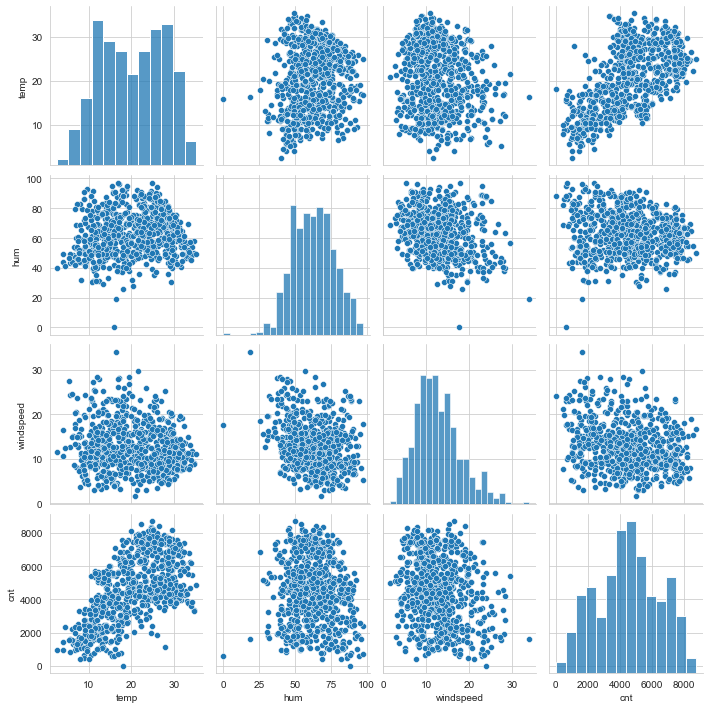

In [21]:
# Visualizing the correlation coefficients of numerical features using pair plot

sns.pairplot(bike_clean[num_vars])
plt.show()

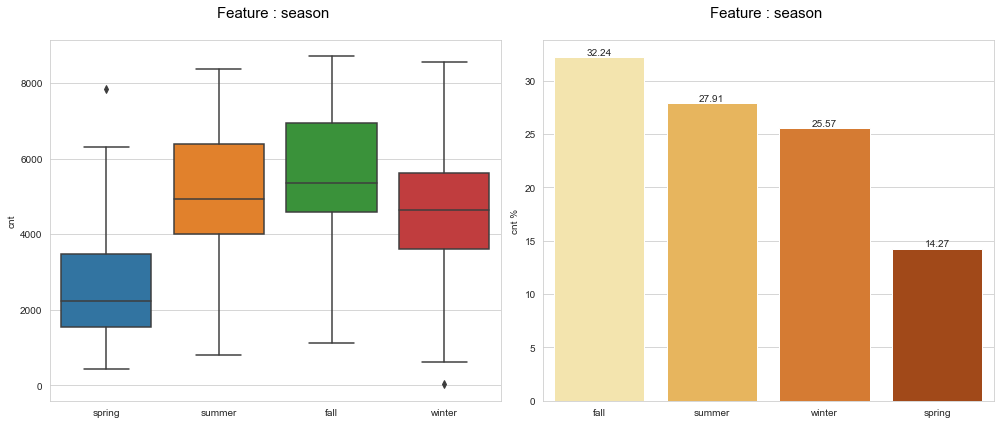

-------------------------------------------------------------------------------------------------------------------------------


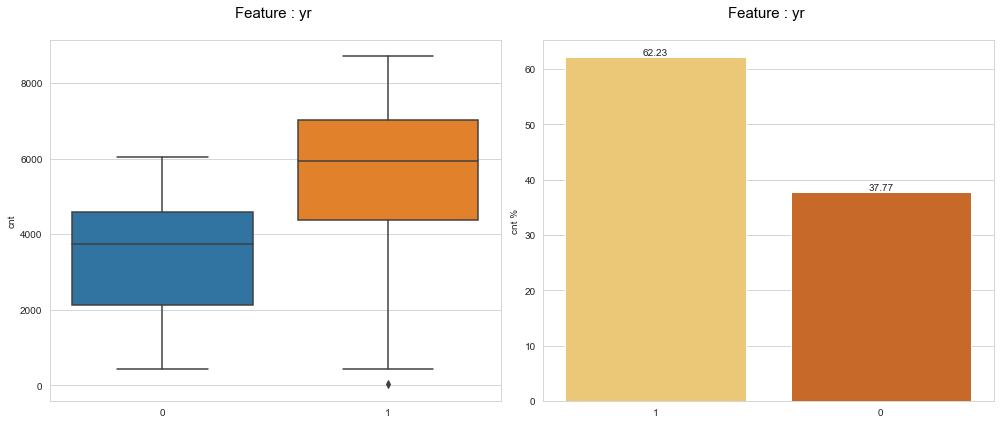

-------------------------------------------------------------------------------------------------------------------------------


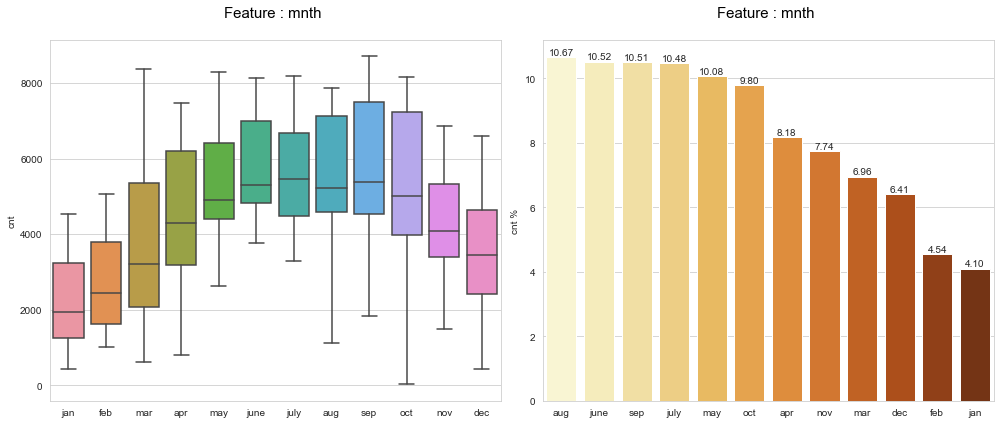

-------------------------------------------------------------------------------------------------------------------------------


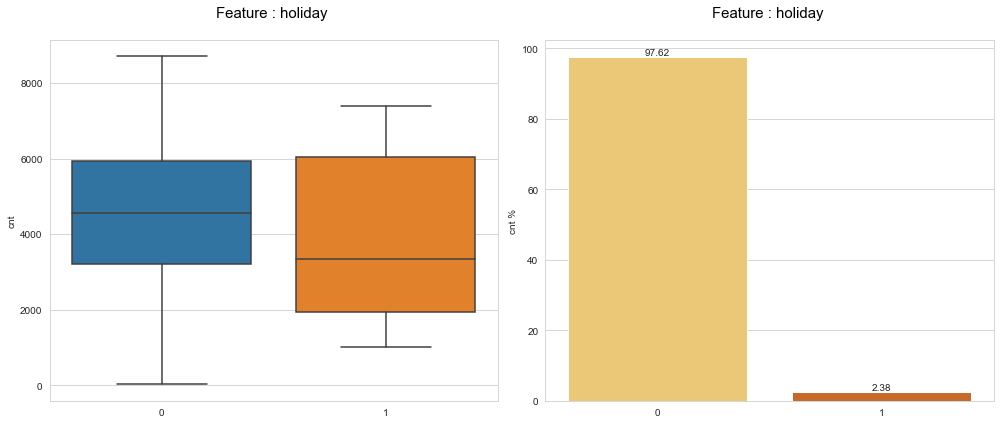

-------------------------------------------------------------------------------------------------------------------------------


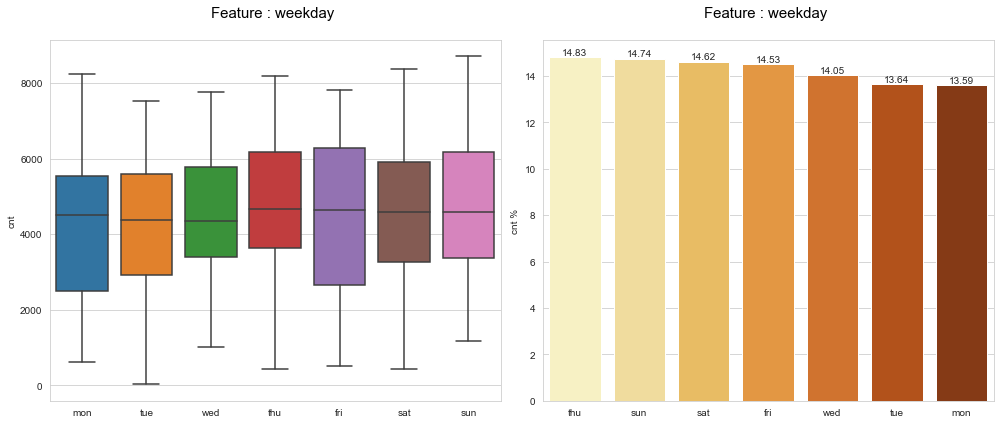

-------------------------------------------------------------------------------------------------------------------------------


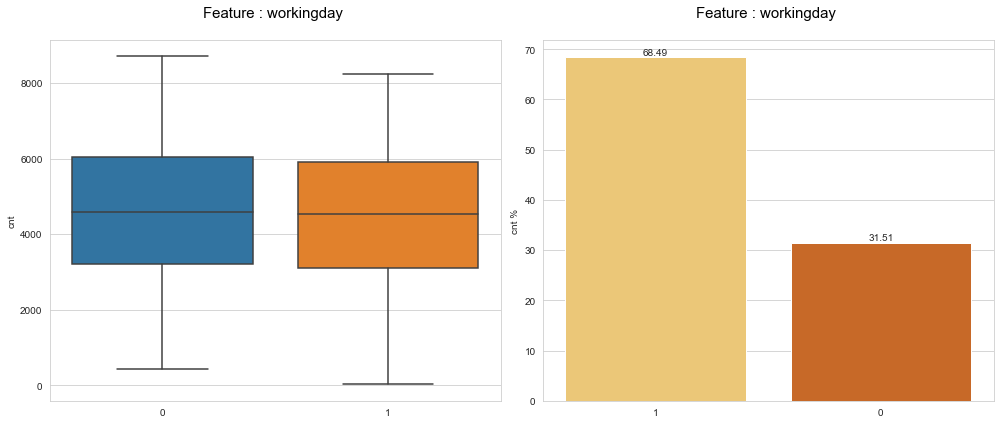

-------------------------------------------------------------------------------------------------------------------------------


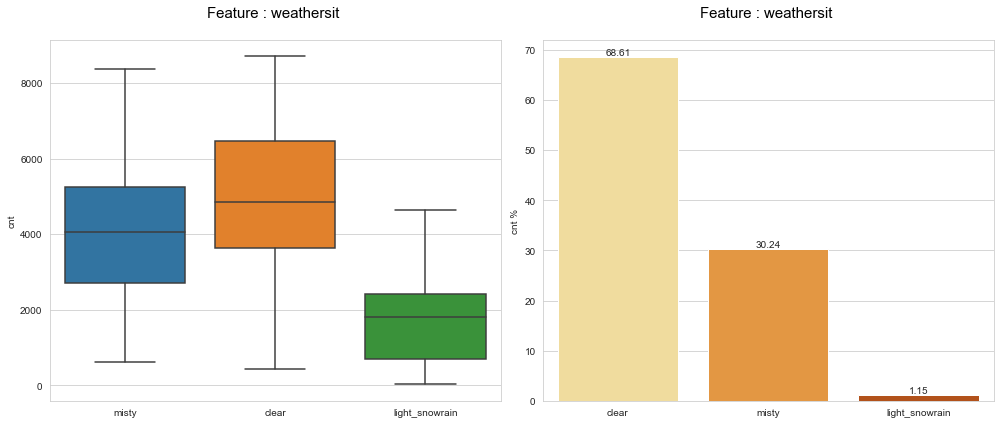

-------------------------------------------------------------------------------------------------------------------------------


In [22]:
# Visualizing categorical features using box plot and bar plot

for feature in cat_vars:
    df=bike_clean[[feature,'cnt']].groupby([feature],as_index=False).sum()
    df.sort_values(by='cnt', ascending=False, inplace=True)
    df1=bike_clean[[feature,'cnt']].groupby([feature],as_index=False).sum()
    df1['cnt']=df1["cnt"]/(df1["cnt"].sum())*100
    df1.sort_values(by='cnt', ascending=False, inplace=True)
          
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
    
    # 1. Subplot 1: box plot of categorical column
    s=sns.boxplot(ax=ax1,x=feature,y="cnt",data=bike_clean)
    ax1.set_xlabel("")
    ax1.set_title(f"Feature : {feature} \n", fontdict={'fontsize' : 15, 'fontweight' : 12, 'color' : 'Black'})
    
    # 2. Subplot 2: cnt% within the categorical column
    s = sns.barplot(ax=ax2,x = feature, y='cnt', data=df1,order=df1[feature], palette='YlOrBr')
    ax2.set_xlabel("")
    ax2.bar_label(ax2.containers[0], fmt='\n%.2f', label_type='edge')
    ax2.set_title(f"Feature : {feature} \n", fontdict={'fontsize' : 15, 'fontweight' : 12, 'color' : 'Black'})
    ax2.set_ylabel("cnt %")
    plt.tight_layout()
    plt.show()
    print("-"*127)

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

<b>Insights from the pairplot of the numerical features:</b>

1. There is a linear relationship between `temp`, `atemp` and `count`. 
2. Both `temp` and `atemp` have strong linear relationship hence cannot be used in the model due to multicolinearity. 

<b>Insights from the box-plot of the categorical features:</b>

1. `season`, `yr`, `mnth`, `weathersit` show trends for booking, thus seem to be a good predictor for the dependent variable
2. `weekday` shows close trend and may or may not be a good predictor for the dependent variable.
3. `workingday` does not show any trends for booking hence it may not be a good predictor for the dependent variable.
4. `holiday` shows trends for booking and can be a predictor for the dependent variable.
    
<b>Insights from the bar-plot of the categorical features:</b>    
1. `season`: Fall season seems to have attracted more bookings.
2. `yr`: 2019 attracted more number of bookings as compared to 2018, which shows good progress in terms of business.
3. `mnth`: Most of the bookings have been done between the month of may to oct, with aug recoding highest bookings.
4. `holiday`: Less bookings when its not a holiday as people may want to spend time at home and enjoy with family.
5. `weekday`: Number of bookings look identical across the weekdays.
6. `workingday`: More bookings on workingday.
7. `weathersit`: Clear weather attracted more bookings which seems obvious.
<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# 7. Preparing the Data for Modelling

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

### a. Encoding

In [23]:
# Selecting the columns fit for categorical type

dummy_vars=[]
for col in bike_clean.columns:
    if (bike_clean[col].nunique()<13 and bike_clean[col].nunique()>2):
        dummy_vars.append(col)
dummy_vars

['season', 'mnth', 'weekday', 'weathersit']

In [24]:
# Converting the selected columns to categorical type

for col in dummy_vars:
    bike_clean[col]=bike_clean[col].astype('category')

In [25]:
# Validating changes

bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(3), int64(4)
memory usage: 44.0 KB


In [26]:
# Creating dummy variables for the selected features

bike_clean = pd.get_dummies(bike_clean, drop_first=True)

In [27]:
# Checking information of the prepared dataset

bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   hum                        730 non-null    float64
 5   windspeed                  730 non-null    float64
 6   cnt                        730 non-null    int64  
 7   season_spring              730 non-null    uint8  
 8   season_summer              730 non-null    uint8  
 9   season_winter              730 non-null    uint8  
 10  mnth_aug                   730 non-null    uint8  
 11  mnth_dec                   730 non-null    uint8  
 12  mnth_feb                   730 non-null    uint8  
 13  mnth_jan                   730 non-null    uint8  

In [28]:
# Checking the shape of prepared data

bike_clean.shape

(730, 29)

### b. Test-Train Splitting 

In [29]:
# Importing required libraries

import sklearn 
from sklearn.model_selection import train_test_split

In [30]:
# Splitting the data into train and test

np.random.seed(0)
df_train,df_test=train_test_split(bike_clean,train_size=0.7,random_state=100)
print(f'df_train shape: {df_train.shape}')
print(f'df_test shape: {df_test.shape}')

df_train shape: (510, 29)
df_test shape: (220, 29)


### c. Rescaling

In [31]:
# Importing required libraries

from sklearn.preprocessing import MinMaxScaler

In [32]:
# Instantiating an object

scaler=MinMaxScaler()

# Fitting and transforming the train-set

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

# Displaying statistical summary of train-set after rescaling

df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

- Created dummy variables for categorical features `season`, `mnth`, `weekday` and `weathersit`
- Performed the test-train split
- Fitted and transformed the numerical features `temp`, `atemp`, `hum`, `windspeed` and `cnt` of train data with Min-Max scaling
<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# 8. Training the Model

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

### a. Checking correlation coefficients

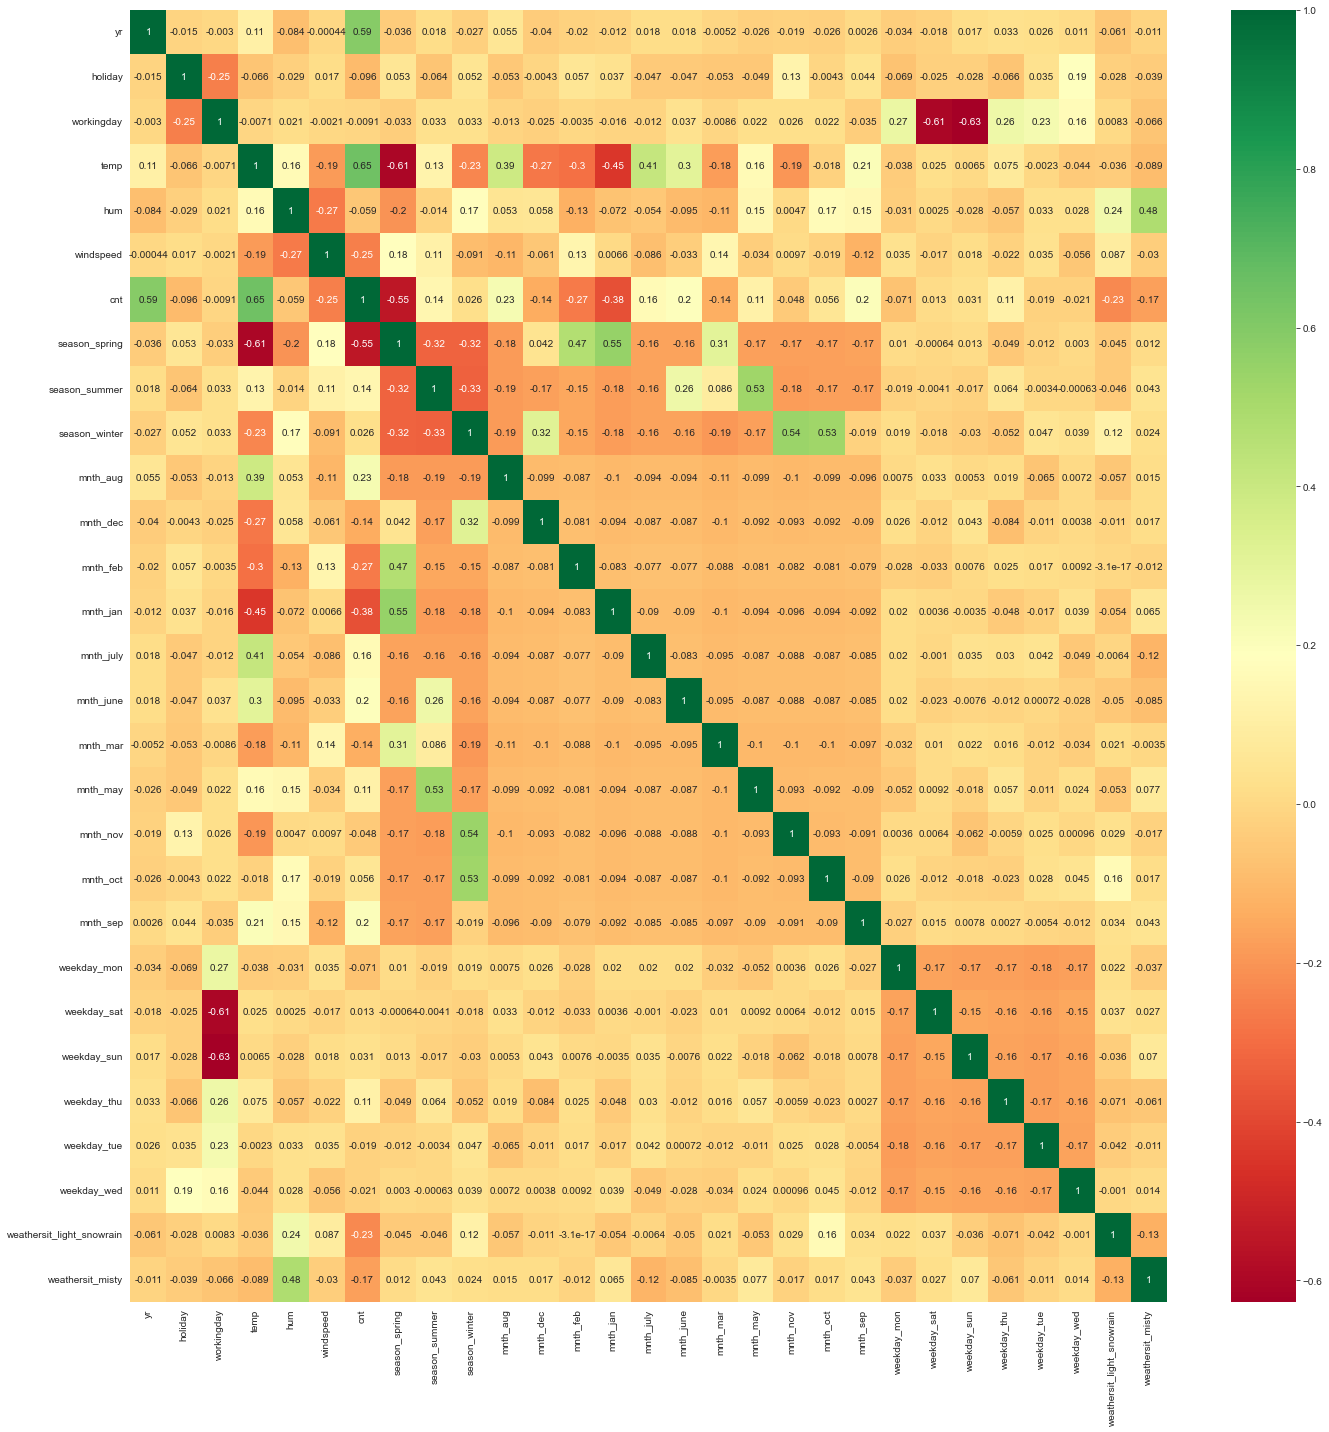

In [33]:
# Visualizing the correlation coefficients of all features using heatmap

plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn')
plt.tight_layout()
plt.show()

### b. Splitting into X_train and y_train

In [34]:
# Creating X_train and y_train

y_train=df_train.pop("cnt")
X_train=df_train

### c. Selecting features using RFE

In [35]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, n_features_to_select=15)

rfe = rfe.fit(X_train, y_train)

In [37]:
# Investigating feature ranking

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 9),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 11),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 8),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 7),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 10),
 ('weathersit_light_snowrain', True, 1),
 ('weathersit_misty', True, 1)]

In [38]:
# Checking top ranked features

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_july',
       'mnth_nov', 'mnth_sep', 'weathersit_light_snowrain',
       'weathersit_misty'],
      dtype='object')

In [39]:
# Checking insignificant features

X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_aug', 'mnth_feb', 'mnth_june', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [40]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

- It is evident from the heatmap that the target variable has correlation with some of the independent variables.
- The heatmap also suggests that some of the independent variables are correlated.
- The data is fit for building linear regression model, hence proceeded with splitting and recursive function elimination(RFE) for feature ranking for selecting the features.
<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# 9. Modelling the Data

<p style="padding: 0.015px;
              color:white;">
</p>
</div>


In [41]:
# Importing required library

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [42]:
# Defining VIF function

def vif(train_set):
    vif = pd.DataFrame()
    vif['Features'] = train_set.columns
    vif['VIF'] = [variance_inflation_factor(train_set.values, i) for i in range(train_set.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [43]:
# Defining modelling function

def modelling(train_set,lm_name,lr_name):
    # Adding a constant
    globals()[lm_name]=sm.add_constant(train_set)
    
    # Creating a fitted model
    globals()[lr_name]=sm.OLS(y_train, globals()[lm_name]).fit()

    
    # Printing OLS Regression Results
    print((globals()[lr_name]).summary())

##  Model 1

In [44]:
# VIF check

vif(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.82
14,weathersit_misty,2.32
0,yr,2.09
11,mnth_nov,1.85
9,mnth_jan,1.75


In [45]:
# Adding constant, creating a fitted model and printing the OLS Regression Results

modelling(X_train_rfe,"X_train_lm1","lr1")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Sun, 22 Jan 2023   Prob (F-statistic):          8.15e-189
Time:                        16:57:53   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Model 2

In [46]:
# Removing the variable 'hum' based on its high VIF

X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [47]:
# VIF check

vif(X_train_rfe)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.95
4,season_spring,2.89
5,season_summer,2.24
0,yr,2.07
10,mnth_nov,1.81
8,mnth_jan,1.66
9,mnth_july,1.59
13,weathersit_misty,1.57


In [48]:
# Adding constant, creating a fitted model and printing the OLS Regression Results

modelling(X_train_rfe,"X_train_lm2","lr2")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Sun, 22 Jan 2023   Prob (F-statistic):          4.75e-186
Time:                        16:57:53   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Model 3

In [49]:
# Removing the variable 'mnth_nov' based on its high p-value

X_train_rfe = X_train_rfe.drop(["mnth_nov"], axis = 1)

In [50]:
# VIF check

vif(X_train_rfe)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
4,season_spring,2.89
5,season_summer,2.24
0,yr,2.07
6,season_winter,2.05
8,mnth_jan,1.65
9,mnth_july,1.59
12,weathersit_misty,1.57
10,mnth_sep,1.34


In [51]:
# Adding constant, creating a fitted model and printing the OLS Regression Results

modelling(X_train_rfe,"X_train_lm3","lr3")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Sun, 22 Jan 2023   Prob (F-statistic):          2.74e-186
Time:                        16:57:53   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Model 4

In [52]:
# Removing the variable 'mnth_dec' based on its high p-value

X_train_rfe= X_train_rfe.drop(["mnth_dec"], axis = 1)

In [53]:
# VIF check

vif(X_train_rfe)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
4,season_spring,2.75
5,season_summer,2.24
0,yr,2.07
6,season_winter,1.78
7,mnth_jan,1.61
8,mnth_july,1.59
11,weathersit_misty,1.56
9,mnth_sep,1.34


In [54]:
# Adding constant, creating a fitted model and printing the OLS Regression Results

modelling(X_train_rfe,"X_train_lm4","lr4")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Sun, 22 Jan 2023   Prob (F-statistic):          8.14e-187
Time:                        16:57:53   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Model 5

In [55]:
# Removing the variable 'mnth_jan' based on its high p-value

X_train_rfe = X_train_rfe.drop(["mnth_jan"], axis = 1)

In [56]:
# VIF check

vif(X_train_rfe)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,season_summer,2.23
4,season_spring,2.08
0,yr,2.07
6,season_winter,1.78
7,mnth_july,1.58
10,weathersit_misty,1.55
8,mnth_sep,1.34
9,weathersit_light_snowrain,1.08


In [57]:
# Adding constant, creating a fitted model and printing the OLS Regression Results

modelling(X_train_rfe,"X_train_lm5","lr5")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Sun, 22 Jan 2023   Prob (F-statistic):          5.06e-187
Time:                        16:57:53   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Model 6

In [58]:
# Removing the variable 'mnth_july' based on its high VIF

X_train_rfe = X_train_rfe.drop(["mnth_july"], axis = 1)

In [59]:
# VIF check

vif(X_train_rfe)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
4,season_spring,1.99
5,season_summer,1.90
6,season_winter,1.63
9,weathersit_misty,1.55
7,mnth_sep,1.23
8,weathersit_light_snowrain,1.08
1,holiday,1.04


In [60]:
# Adding constant, creating a fitted model and printing the OLS Regression Results

modelling(X_train_rfe,"X_train_lm6","lr6")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Sun, 22 Jan 2023   Prob (F-statistic):          1.47e-186
Time:                        16:57:53   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Model 7

In [61]:
# Removing the variable 'season-spring' based on its high p-value

X_train_rfe = X_train_rfe.drop(["season_spring"], axis = 1)

In [62]:
# VIF check

vif(X_train_rfe)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
4,season_summer,1.57
8,weathersit_misty,1.48
5,season_winter,1.37
6,mnth_sep,1.20
7,weathersit_light_snowrain,1.08
1,holiday,1.04


In [63]:
# Adding constant, creating a fitted model and printing the OLS Regression Results

modelling(X_train_rfe,"X_train_lm7","lr7")

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Sun, 22 Jan 2023   Prob (F-statistic):          2.83e-186
Time:                        16:57:53   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [64]:
# Checking the parameters and their coefficient values of final model (lr7)

lr7.params

const                        0.125926
yr                           0.232861
holiday                     -0.098685
temp                         0.548008
windspeed                   -0.153246
season_summer                0.088080
season_winter                0.129345
mnth_sep                     0.101195
weathersit_light_snowrain   -0.282869
weathersit_misty            -0.078375
dtype: float64

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

- Manually eliminated independent variables on the basis of high p-value and high VIF
- Considered Model 7(lr7) as the final model, since it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# 10. Residual Analysis and Validation of Assumptions

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

In [65]:
# Making predictions on the train set

y_train_pred=lr7.predict(X_train_lm7)

# Finding residuals

res=y_train-y_train_pred

### a. Linear Relationship

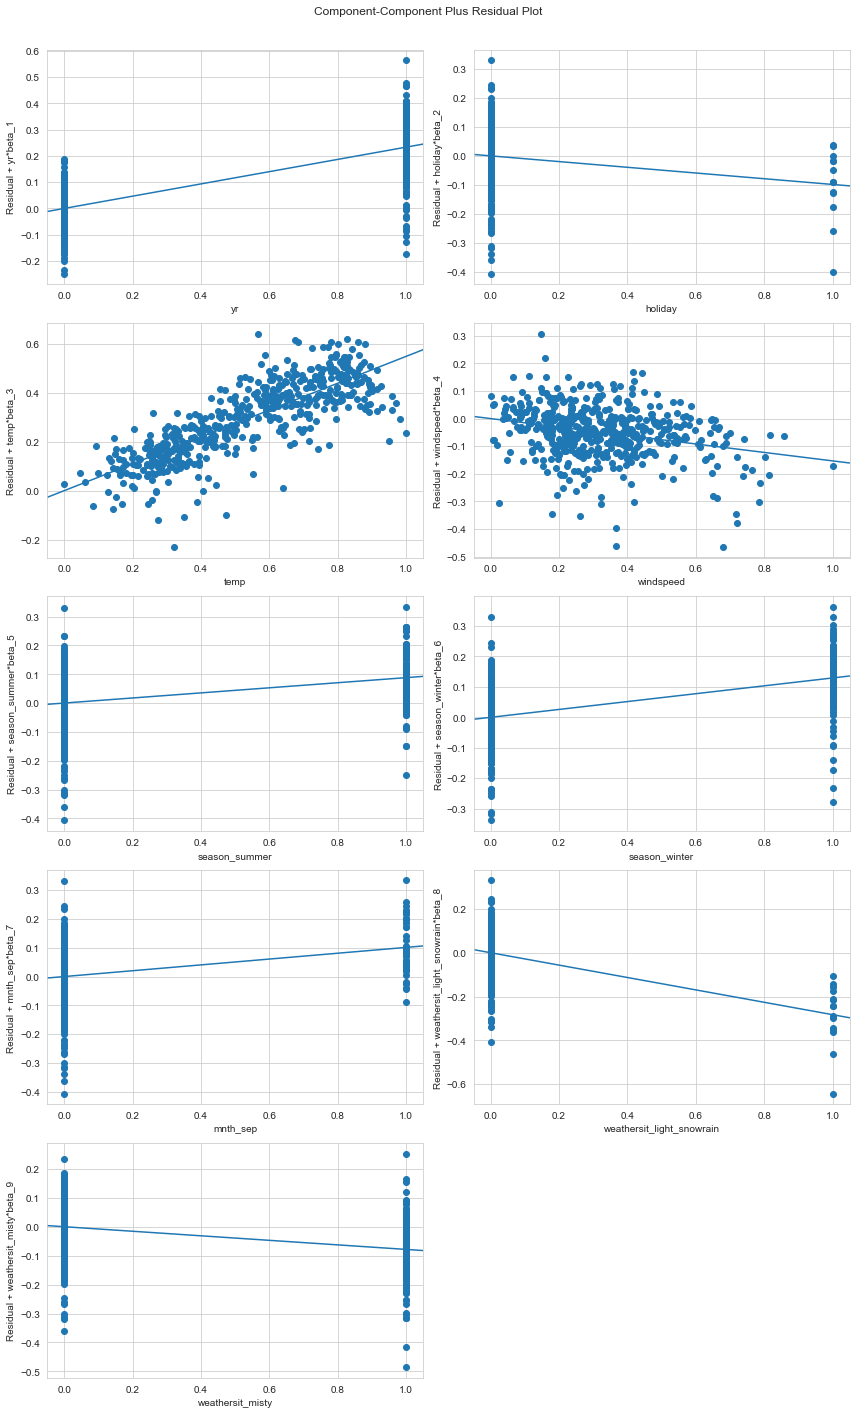

In [66]:
# Plotting CCPR plot to check linear relationship between the outcome and the independent variables

fig = plt.figure(figsize=(12, 20))
sm.graphics.plot_ccpr_grid(lr7, fig=fig)
plt.show()

### b. Multivariate Normality

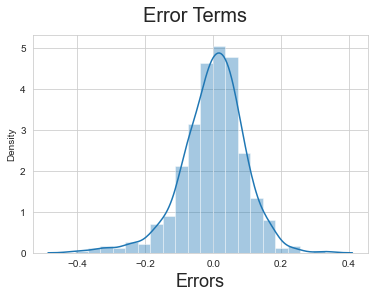

In [67]:
# Ploiting the histogram of the error terms

fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### c. No multicollinearity

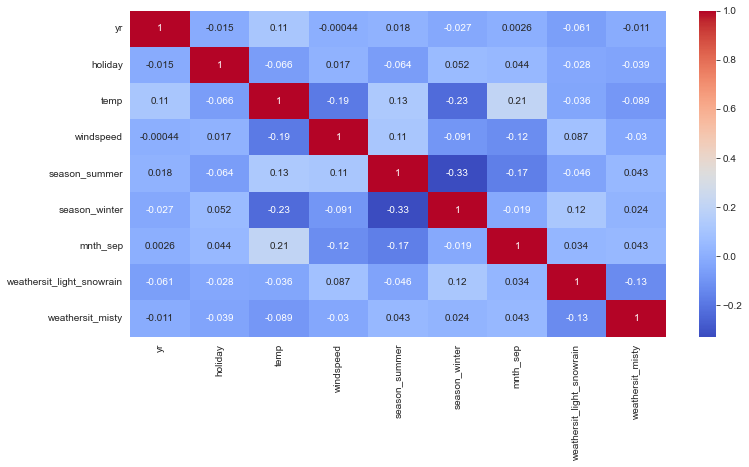

In [68]:
# Validating no multicollinearity using heatmap

plt.figure(figsize=(12,6))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="coolwarm")
plt.show()

### d. Homoscedasticity

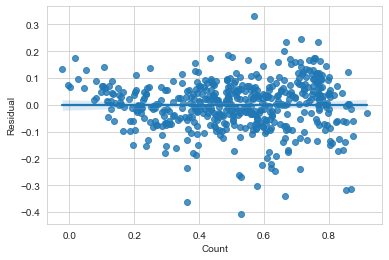

In [69]:
# Homoscedasticity check using scatter plot

sns.regplot(y_train_pred,res)
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

### e. No Autocorrelation

In [70]:
# Checking Durbin Watson for Autocorrelation

from statsmodels.stats.stattools import durbin_watson
round(durbin_watson(lr7.resid),3)

2.097

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

- The CCPR Plot confirms the linear relationship between the independent and the depended variables.
- The histogram confirms that the errors between observed and predicted values (i.e., the residuals of the regression) are normally distributed.
- The heatmap confirms that there is no multicollinearity in the data as the magnitude of the correlation coefficients is less than .80.
- The regplot of residuals versus predicted values confirms that there is no clear pattern in the distribution.
- The Durbin-Watson value of final model lr7 is 2.097, which signifies there is no autocorrelation.
<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# 11. Prediction on Test Set

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

### a). Applying Scaling on Test Set

In [71]:
# Transforming numeric features using min-max scaler

df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_snowrain,weathersit_misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### b). Splitting into X_test and y_test

In [72]:
# X_test and y-test split

y_test = df_test.pop('cnt')
X_test = df_test

### c). Making Predictions

In [73]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_test_pred = lr7.predict(X_test_new)

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

- Transformed the numeric features of the test data with Min Max scaler.
- Splitted the test data into X_test and y_test and dropped features in X_test to aling with X_train.
- Made predications on the test set using the final model (lr7).
<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# 12. Model Evaluation

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

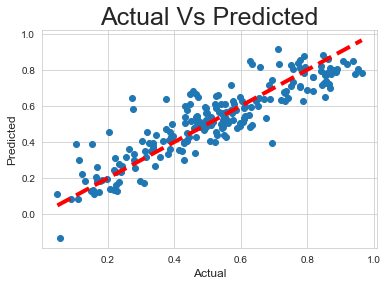

In [74]:
# Plotting Actual vs Predicted to understand the spread.

fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
ax.set_title("Actual Vs Predicted",fontsize=25)             # Plot heading 
ax.set_xlabel('Actual',fontsize=12)                         # X-label
ax.set_ylabel('Predicted',fontsize=12)                      # Y-label
plt.show()

In [75]:
# Evaluating on R2_Score

from sklearn.metrics import r2_score

print(f'R2-Score of Train Set: {r2_score(y_true=y_train,y_pred=y_train_pred)}')
print(f'R2-Score of Test Set: {r2_score(y_true=y_test,y_pred=y_test_pred)}')                                       

R2-Score of Train Set: 0.8303450237489229
R2-Score of Test Set: 0.7941977535477243


In [76]:
# Evaluating on Adjusted_R2

print(f'Adjusted R2 of Train Set: {1-(1-r2_score(y_true=y_train,y_pred=y_train_pred))*(X_train_rfe.shape[0]-1)/(X_train_rfe.shape[0]-X_train_rfe.shape[1]-1)}')
print(f'Adjusted R2 of Test Set: {1-(1-r2_score(y_true=y_test,y_pred=y_test_pred))*(X_test_new.shape[0]-1)/(X_test_new.shape[0]-X_test_new.shape[1]-1)}')

Adjusted R2 of Train Set: 0.8272912341764036
Adjusted R2 of Test Set: 0.7843507561098164


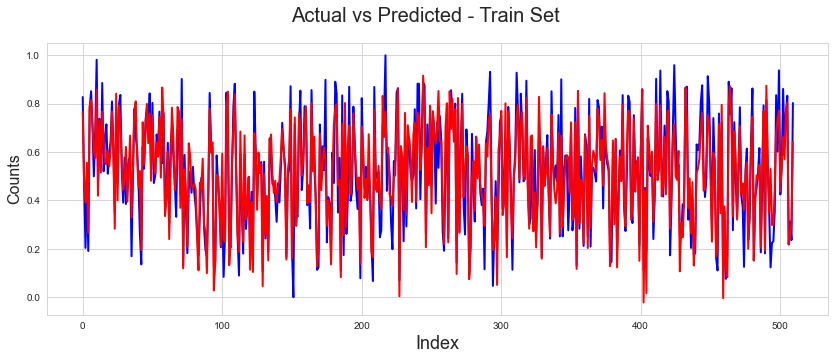

In [77]:
# Evaluating of Actual Vs Predicted Plot of Train Set

c = [i for i in range(0,len(X_train_rfe),1)]
plt.figure(figsize=(14,5))
plt.plot(c,y_train, color="blue",linewidth=2.0)
plt.plot(c,y_train_pred, color="red",linewidth=2.0)
plt.suptitle('Actual vs Predicted - Train Set', fontsize = 20)  # Plot title 
plt.xlabel('Index', fontsize=18)                                 # X-label
plt.ylabel('Counts', fontsize=16)                                # Y-label
plt.show()

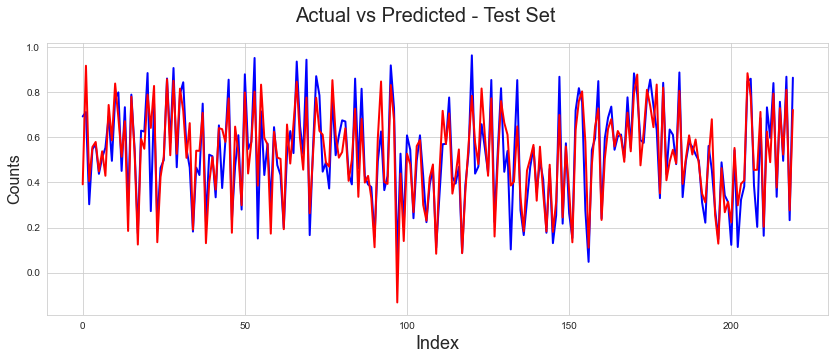

In [78]:
# Evaluating of Actual Vs Predicted Plot of Test Set

c = [i for i in range(0,len(X_test_new),1)]
plt.figure(figsize=(14,5))
plt.plot(c,y_test, color="blue",linewidth=2.0)
plt.plot(c,y_test_pred, color="red",linewidth=2.0)
plt.suptitle('Actual vs Predicted - Test Set', fontsize = 20)  # Plot title 
plt.xlabel('Index', fontsize=18)                                 # X-label
plt.ylabel('Counts', fontsize=16)                                # Y-label
plt.show()

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### Summary:

- The variance of the residuals (error terms) is constant across predictions, i.e error term does not vary much as the value of the predictor variable changes.
- The R2 scores of train and test data are 0.83 and 0.79 respectively.
- The adjusted R2 scores of train and test data are 0.83 and 0.78 respectively which is pretty decent.
- Predictions on train and test data is very close to actuals.
<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#1663BE;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.015px;
              color:black;">  

# 13. Conclusion

<p style="padding: 0.015px;
              color:white;">
</p>
</div>

<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### 1. Equation of best fit line:  
    
      


      
`cnt` = 0.125926 + 0.232861 x `yr` - 0.098685 x `holiday` + 0.548008 x `temp` - 0.153246 x `windspeed` + 0.088080 x `season_summer` +
    
0.129345 x `season_winter` + 0.101195 x `mnth_sep` - 0.282869 x `weathersit_light_snowrain` - 0.078375 x `weathersit_misty`      </b>      
<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### 2. Variables significant in predicting the demand for shared bikes:  
    
   
`yr`, `holiday`, `temp`, `windspeed`, `season_summer`, `season_winter`,   

`mnth_sep`, `weathersit_light_snowrain`, `weathersit_misty`    
 </b>      
<p style="padding: 0.05px;
              color:white;">
</p>
</div>


<div style="color:maroon;
           display:fill;
           border-radius:5px;
           background-color:#FFE5B4;
           font-size:110%;
           font-family:Calibri;
           letter-spacing:0.5px">

<p style="padding: 0.02px;
              color:white;">

### 3. How well the significant variables describe the bike demands?  
    
   
- `yr`, `temp`, `season_summer`, `season_winter`, `mnth_sep` : Positively impact the bike demands. 
    
    
- `holiday`,`windspeed`,`weathersit_light_snowrain`,`weathersit_misty`: Negatively impact the bike demands.
    
 </b>      
<p style="padding: 0.05px;
              color:white;">
</p>
</div>
